<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/Choose_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing 3 training strategies...

Strategy     Batch Size   Train Acc  Test Acc   Epochs   Time (sec)
------------------------------------------------------------
Online       1            0.9003     0.8984     23       319.9
Mini-batch   64           0.9193     0.9127     61       21.5


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Batch        56000        0.8833     0.8826     200      25.5


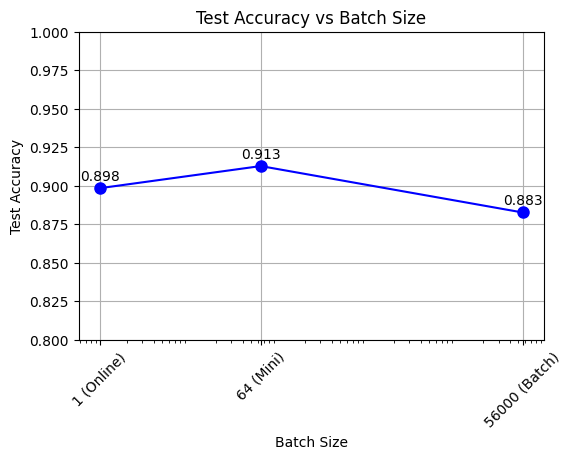

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import time

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

images = X.reshape(-1, 28, 28)

def extract_4x4_features(img):

    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

X_features = np.array([extract_4x4_features(img) for img in images])

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y)


strategies = {
    'Online': 1,
    'Mini-batch': 64,
    'Batch': len(X_train)
}

results = []
print("Testing 3 training strategies...\n")
print(f"{'Strategy':<12} {'Batch Size':<12} {'Train Acc':<10} {'Test Acc':<10} {'Epochs':<8} {'Time (sec)'}")
print("-" * 60)

for name, bs in strategies.items():
    start = time.time()
    mlp = MLPClassifier(
        hidden_layer_sizes=(10,),
        activation='tanh',
        learning_rate='constant',
        learning_rate_init=0.01,
        batch_size=bs,
        max_iter=200,
        random_state=42,
        verbose=False
    )
    mlp.fit(X_train, y_train)
    end = time.time()

    train_acc = mlp.score(X_train, y_train)
    test_acc = mlp.score(X_test, y_test)
    epochs = mlp.n_iter_
    train_time = round(end - start, 1)

    results.append((name, bs, train_acc, test_acc, epochs, train_time))
    print(f"{name:<12} {bs:<12} {train_acc:.4f}     {test_acc:.4f}     {epochs:<8} {train_time}")


sizes = [r[1] for r in results]
test_accs = [r[3] for r in results]
plt.figure(figsize=(6,4))
plt.plot(sizes, test_accs, 'bo-', markersize=8)
plt.title('Test Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.xticks(sizes, ['1 (Online)', '64 (Mini)', f'{len(X_train)} (Batch)'], rotation=45)
plt.grid(True)
plt.ylim(0.8, 1.0)
for x, y in zip(sizes, test_accs):
    plt.text(x, y+0.005, f'{y:.3f}', ha='center')
plt.show()